In [153]:
import pandas as pd

import matplotlib.pyplot as plt
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib as mpl

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [154]:
base_url = 'https://understat.com/match/14746'
url = base_url

In [63]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

#get only the shotsData
strings = scripts[1].string

# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
data

{'h': [{'id': '416719',
   'minute': '0',
   'result': 'Goal',
   'X': '0.8909999847412109',
   'Y': '0.565',
   'xG': '0.37904277443885803',
   'player': 'John McGinn',
   'h_a': 'h',
   'player_id': '7723',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'LeftFoot',
   'match_id': '14746',
   'h_team': 'Aston Villa',
   'a_team': 'Manchester City',
   'h_goals': '1',
   'a_goals': '2',
   'date': '2021-04-21 19:15:00',
   'player_assisted': 'Ollie Watkins',
   'lastAction': 'Pass'},
  {'id': '416720',
   'minute': '4',
   'result': 'BlockedShot',
   'X': '0.9569999694824218',
   'Y': '0.6170000076293946',
   'xG': '0.10703869163990021',
   'player': 'Douglas Luiz',
   'h_a': 'h',
   'player_id': '6122',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'LeftFoot',
   'match_id': '14746',
   'h_team': 'Aston Villa',
   'a_team': 'Manchester City',
   'h_goals': '1',
   'a_goals': '2',
   'date': '2021-04-21 19:15:00',
   'player_assisted': 'Bertrand Traor

In [64]:
x = []
y = []
xG = []
result = []
minute = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(float(data_home[index][key]))
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(float(data_away[index][key]))
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])

In [65]:
col_names = ['minute', 'x','y','xG','result','team']
df = pd.DataFrame([minute, x,y,xG,result,team],index=col_names)
df = df.T
df

,minute,x,y,xG,result,team
0,0,0.8909999847412109,0.565,0.379043,Goal,Aston Villa
1,4,0.9569999694824218,0.6170000076293946,0.107039,BlockedShot,Aston Villa
2,6,0.865999984741211,0.3029999923706055,0.0571174,BlockedShot,Aston Villa
3,6,0.84,0.6029999923706054,0.0814935,SavedShot,Aston Villa
4,27,0.899000015258789,0.7130000305175781,0.0442773,MissedShots,Aston Villa
5,44,0.889000015258789,0.5359999847412109,0.0656537,MissedShots,Aston Villa
6,50,0.7769999694824219,0.36900001525878906,0.0220032,SavedShot,Aston Villa
7,66,0.9640000152587891,0.5790000152587891,0.0451064,MissedShots,Aston Villa
8,13,0.915,0.515,0.0907386,MissedShots,Manchester City
9,17,0.79,0.6220000076293946,0.0248728,BlockedShot,Manchester City


In [150]:
#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


#this finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])
        
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

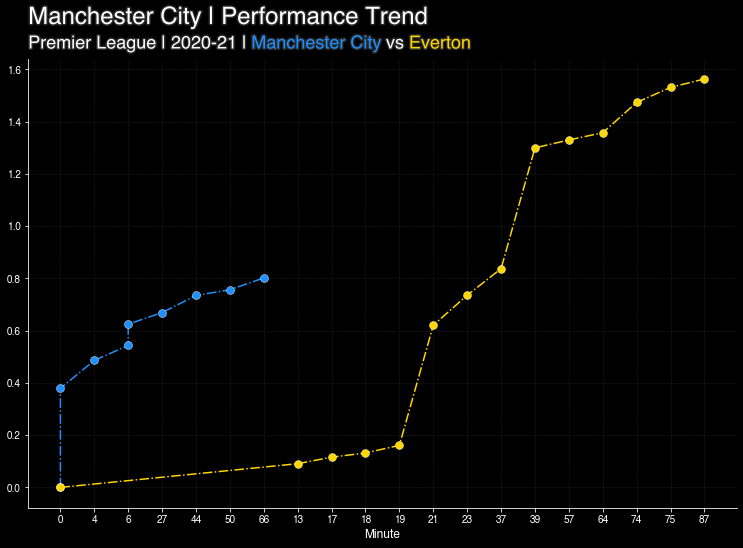

In [164]:
with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(h_min, h_cumulative, color=gd_color,  linestyle="-.", marker = "o", label=hteam, mfc=gd_color, mec="white", markersize=8, mew=0.4, zorder=10) ##expected goals difference
    ax.plot(a_min, a_cumulative, color=xgd_color,  linestyle="-.", marker="o",label=ateam,  mfc=xgd_color, mec="white", markersize=8, mew=0.4, zorder=10)  ##goal-difference
    
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)  
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## labels, titles and subtitles
    ax.set(xlabel=f"Minute")     
    ax.xaxis.label.set(fontsize=12, fontweight='bold')  

    fig.text(x=0.08, y=0.92, s="Manchester City | Performance Trend", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Premier League | 2020-21 | <Manchester City> vs <Everton>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": gd_color},
                                  {"color": xgd_color}])

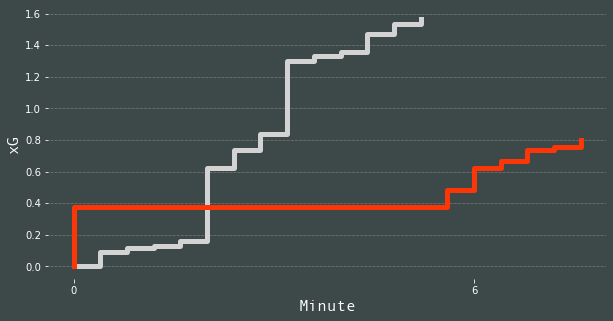

In [152]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#d3d3d3',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cumulative,color='#fd3607',label=ateam,linewidth=5,where='post')